<a href="https://colab.research.google.com/github/Lajs5257/DevF-MachineLearning/blob/main/01_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = (pd.DataFrame(fetch_california_housing()['data'])
          .rename(columns = {i:fetch_california_housing()['feature_names'][i] for i in range(8)})
          .assign(MedHouseVal = fetch_california_housing()['target'])
          )

## Sesgo vs Varianza

Recordemos que cuando estamos ajustando un modelo a un conjunto de datos, de todos los modelos que estemos probando buscamos quedarnos con el modelo que minimice la función de costo, es decir queremos el modelo que en promedio tenga la menor cantidad de perdidas.

En el caso de la regresión lineal la funcion de costo que usamos es el promedio de los errores cuadraticos:

$$\frac{1}{N} \sum_{i=1}^N ( y_i - \hat y )^2 $$

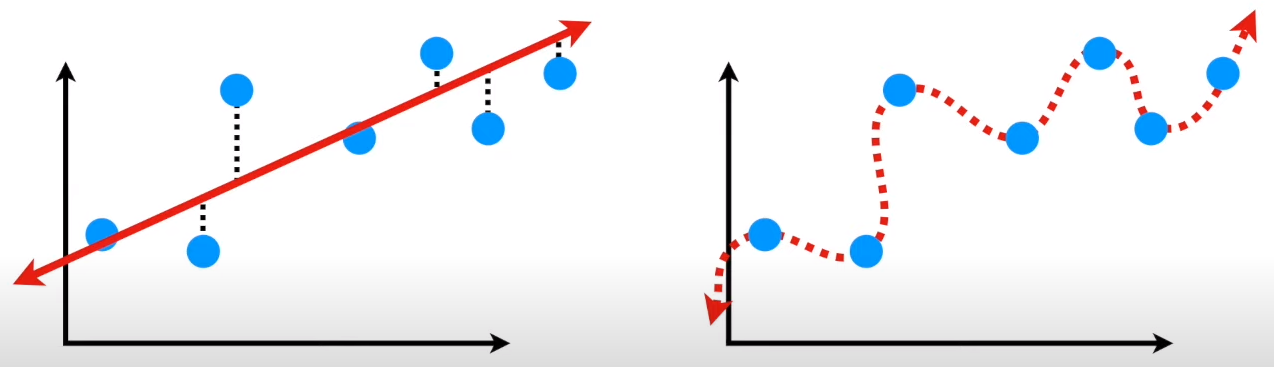

Consideremos los dos modelos mostrados en la parte de arriba, si usamos como criterio el promedio de los errores cuadraticos

1. __Que modelo obtiene el menor promedio de perdidas cuadraticas?__
2. __Que modelo es mejor?__

Despues de haber entrenado nuestro modelo, supongamos que nos llegan datos nuevos, a los que debemos generarles un pronostico

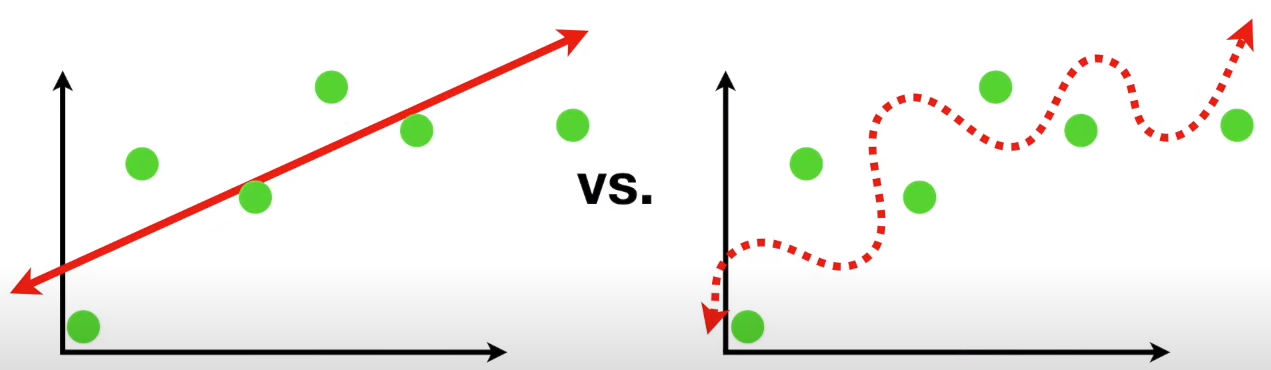

1. __Que modelo tuvo el mejor performance con los datos nuevos?__

Para contestar esta pregunta de la forma mas objetiva posible, tendríamos que medir nuevamente los errores en los que incurrio nuestro modelo al ser usado con estos datos nuevos

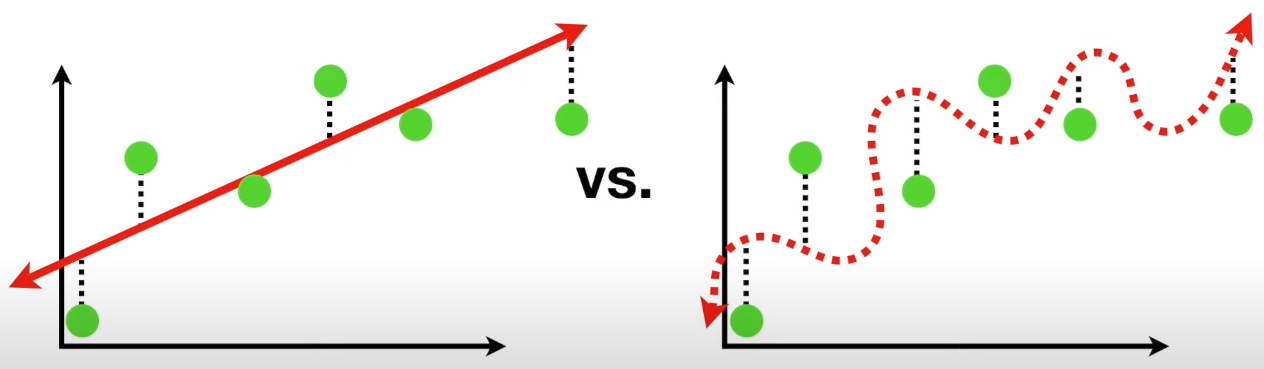

__Sigue siendo el modelo de la derecha el mejor modelo?__

Es claro que el modelo de la derecha ha tenido mas errores con los datos nuevos, que el modelo de la izquierda.

El modelo de la derecha es como esos estudiantes que academicamente son muy buenos, con notas perfectas, pero a la hora de desempeñarse en la vida profesional es un fracaso y no logra adaptarse y porsupuesto que queremos que academicamente sea bueno pero lo que mas queremos es que profesionalmente se desmpeñe muy bien

### __Varianza del modelo__

En el contexto del ML la __varianza del modelo__ es la variabilidad que hay de los puntos reales a los puntos pronosticados, en otras palabras es la disperción que hay entre punto reales y pronosticos.

Los modelos con alta varianza presta mucha atención a los datos de entrenamiento y no generaliza sobre los datos que no ha visto antes. Como resultado, estos modelos funcionan muy bien con los datos de entrenamiento, pero tienen altas tasas de error con los datos de prueba.

### __Sesgo del modelo__

El sesgo del modelo es la diferencia entre la predicción promedio de nuestro modelo y el valor correcto que estamos tratando de predecir. 

Los modelos con alto sesgo presta muy poca atención a los datos de entrenamiento y simplifican demasiado el modelo. Siempre conduce a un alto error en los datos de entrenamiento y prueba.

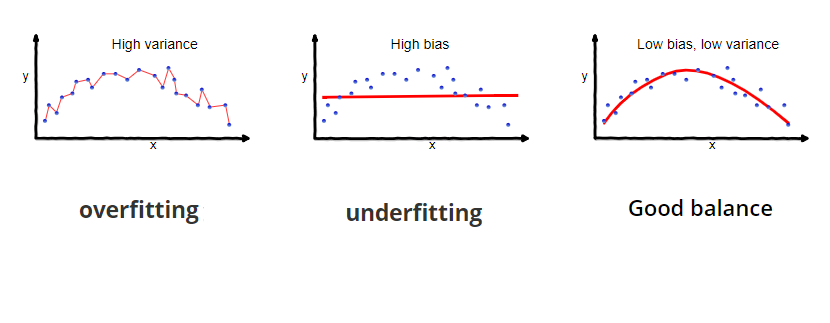

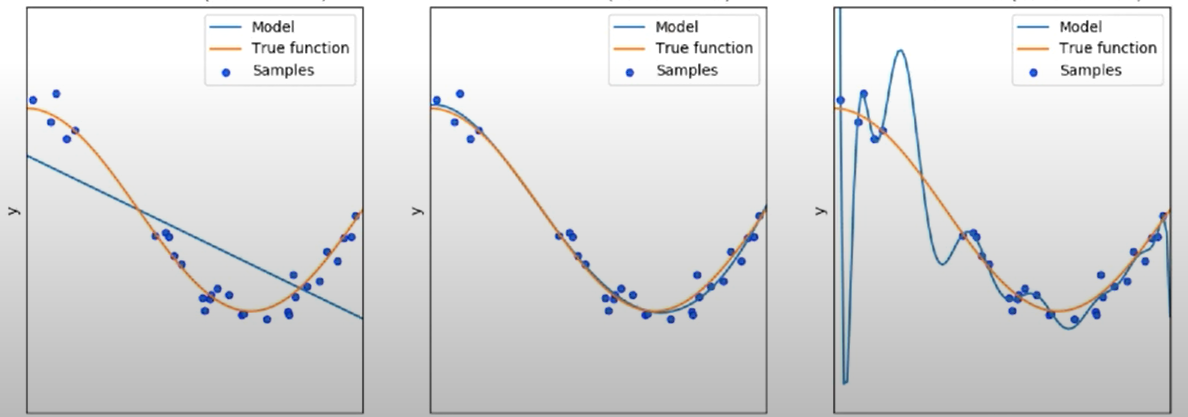

## Train & Test sets

La practica más común para encontrar un modelo con un buen balance es: 

1. Partir los datos historicos en conjuntos de entrenamiento y prueba
2. Entrenar un modelo con los datos del conjunto de entrenamiento
3. Evaluar el performance del modelo en los datos de entrenamiento
4. __Evaluar el performance del modelo en los datos de prueba__


Si al compara las dos evaluaciones ocurre que:

|Evaluación en training|Evaluación en test|Ocurre que el modelo:|
|-|-|-|
|__Mala__|__Mala__|Sufre de underfitting, posiblemente el modelo usado en el ajuste no es<br> el indicado, la calidad o el tamaño de los datos no es suficiente|
|__Buena__|__Mala__|Sufre de overfitting, debemos incrementar el tamaño de los datos de <br>prueba y reducir la complejidad del modelo|
|__Buena__|__Buena__|Esta bien balanceado, es un modelo confiable|

    

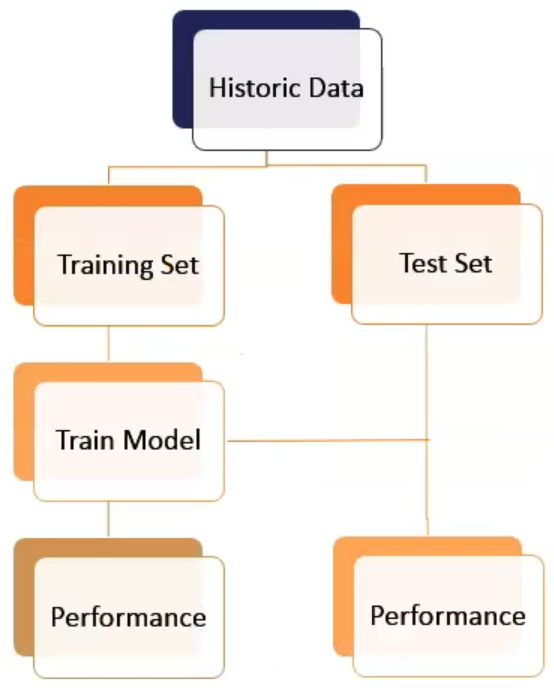

Este forma de trabajar es muy buena pero __NO ES ÚTIL CUANDO DEBEMOS ENCONTRAR LOS MEJORES HIPERPARAMETROS__.

Si trabajamos de esta forma e intentamos tunear hiperparametros el riesgo de filtrar información del conjunto de prueba al modelo (__data leakage__) es muy alto, ya que constantemente estaremos iterando y probando diferentes conjuntos de hiperparametros, esto implica hacernos trampa ya que el mejor modelo es seleccionado con base en el mejor performance sobre el conjunto de prueba

### Implementación en Python

Para generar los conjuntos de train y test en python, usamos:



```python
from sklearn.model_selection import train_test_split
```

Ejemplo:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data.shape

(20640, 9)

In [ ]:
data.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [ ]:
X = data.drop(columns=['MedHouseVal'])
y = data.MedHouseVal

In [ ]:
# partimos los datos en conjuntos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state=42)

In [ ]:
print(X.shape[0])

20640


In [ ]:
print(X_train.shape[0])
print(X_test.shape[0])

15480
5160


In [ ]:
print(f'{len(y):,}', 'instancias totales')
print(f'{len(y_train):,}', 'instancias de entrenamiento')
print(f'{len(y_test):,}', 'instancias de prueba')

20,640 instancias totales
15,480 instancias de entrenamiento
5,160 instancias de prueba


In [ ]:
# 1 Entrenamos usando X_train y y_train
# 2 Usamos el modelo entrenado y evaluamos y_train (guardamos la metrica)
# 3 USamos el modelo entrenado y pronosticamos con X_test
# 4 usamos los pronosticos de X_test (les llamamos y_pred) y los comparamos con y_test (guardamos la metrica)
# 5 comparamos la metrica de train y de test

In [ ]:
# Ejemplo con RL

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
lr = LinearRegression()

In [ ]:
# partimos los datos en conjuntos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20,
                                                    random_state=42)

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# PRONOSTICOP SOBRE ENTRENAMIENTO
y_pred_train = lr.predict(X_train)

In [ ]:
# R cuadrada sobre entrenamiento
metrics.r2_score(y_train, y_pred_train)

0.6125511913966952

In [ ]:
np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))

0.7196757085831575

In [ ]:
# PRONOSTICOP SOBRE PRUEBA (TEST SET)
y_pred_test = lr.predict(X_test)

In [ ]:
# R cuadrada sobre prueba (test)
metrics.r2_score(y_test, y_pred_test)

0.575787706032451

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

0.7455813830127763

## Datos de validación (validation)

La solución al problema anterior conciste en partir nuevamete los datos de entrenamiento en dos conjuntos, uno que será llamado nuevamente conjuto de entrenamiento y otro que llamaremos conjunto de validación, la ida general es:

1. Partir los datos historicos en conjuntos de train y test
2. Dividir el conjunto train en dos conjuntos que llamaremos train y validation
3. Entrenamos uno o mas modelos con los datos de train
4. Evaluamos el performance del modelo en los datos de validación
5. Seleccionamos las mejores versiones de cada modelo
6. Evaluamos los mejores modelos sobre el conjunto de test

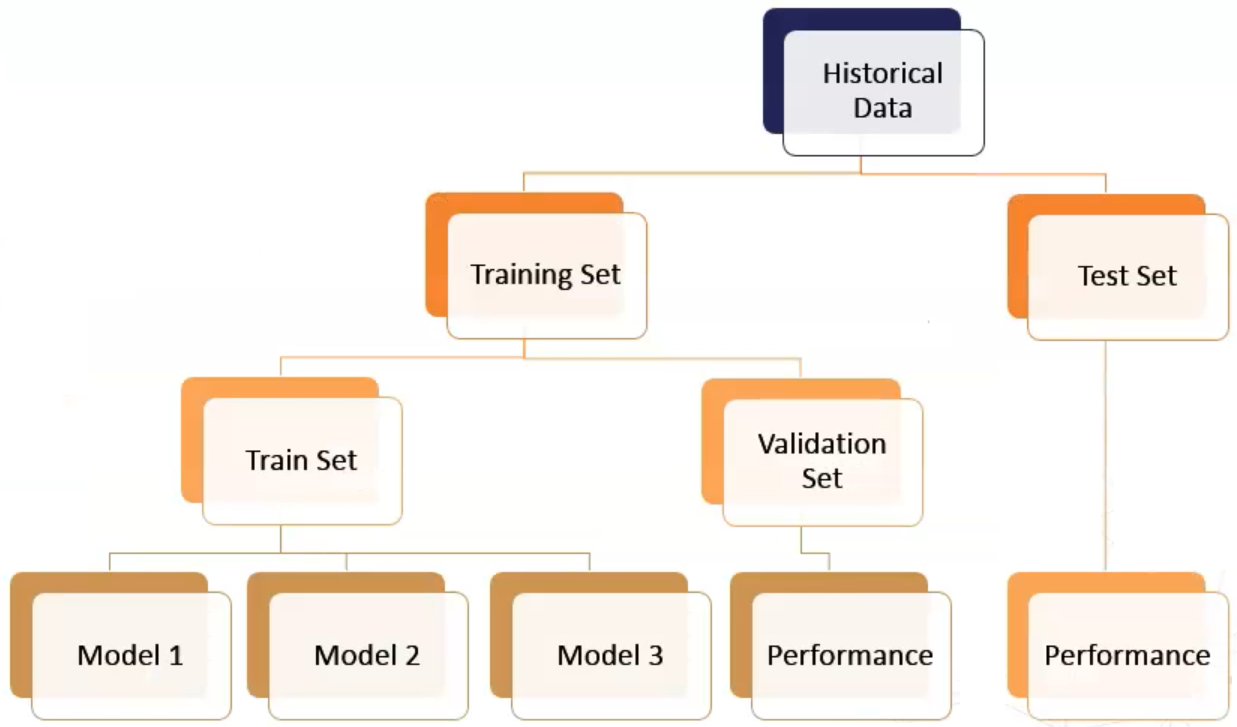

## Train vs Validation vs Test Sets

1. Entrenamiento (__train set__)

    Aqui es donde el algoritmo de ML aprende como se debe de comportar con base en los datos presentes en el conjunto de entrenamiento

2. Validación (__validation set__)

    Este conjunto de datos es usado para proporcionar una evaluación sin sesgo del modelo (esta evaluación es de forma frequente) entrenado con los datos del conjunto de entrenamiento y también es usado para tunear los hiperparametros (es practicamente inevitable que con el pasar de las evaluaciones, el modelo no obtenga cierta información a partir de estos datos) Este conjunto de datos __NUNCA ES USADO PARA ENTRENAR__ solo para validar el modelo.

    De alguna forma indirecta, el conjunto de validación afecta indirectamente al modelo

    Si no vamos a tunear ningún hiperparametro, no es necesario generar un conjunto de validación

3. Prueba (__Test set__)

    Conjunto de datos usado para proporcionar una evaluación sin sesgo (solo es usado una vez), esta evaluación se lleva a cabo solo cuando el modelo ha sido entrenado completamente (usando los conjuntos de entrenamiento y validación) 
    
    Si tenemos varios modelos buenos que hemos entrenado, este conjunto lo usamos para evaluarlos y ver cual es el mejor 

### Validation set en python

Para generar conjuntos de train, test y validación en python usamos:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(columns=['MedHouseVal'])
y = data.MedHouseVal

In [ ]:
# partimos los datos en conjuntos de prueba y entrenamiento
X_train_val, X_test, y_train_val, y_test = train_test_split(X, 
                                                            y,
                                                            test_size = 0.20,
                                                            random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, 
                                                  y_train_val,
                                                  test_size = 0.20,
                                                  random_state=42)

In [ ]:
print(f'{len(y):,}', 'instancias totales')
print(f'{len(y_train):,}', 'instancias de entrenamiento')
print(f'{len(y_val):,}', 'instancias de validación')
print(f'{len(y_test):,}', 'instancias de prueba')

20,640 instancias totales
13,209 instancias de entrenamiento
3,303 instancias de validación
4,128 instancias de prueba


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
X = data.drop(columns=['MedHouseVal'])
y = data.MedHouseVal

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,
                                                            test_size = 0.20,
                                                            random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                  test_size = 0.20,
                                                  random_state=42)

In [ ]:
ridge_r = Ridge(alpha = .05)
ridge_r.fit(X_train, y_train)
y_pred_train_dot5 = ridge_r.predict(X_train)
y_pred_val_dot5 = ridge_r.predict(X_val)
# R cuadrada sobre entrenamiento
print(metrics.r2_score(y_train, y_pred_train_dot5))
# R cuadrada sobre validación
print(metrics.r2_score(y_val, y_pred_val_dot5))

0.6131488908335253
0.6097022641202449


In [ ]:
ridge_r = Ridge(alpha = 1)
ridge_r.fit(X_train, y_train)
y_pred_train_dot0001 = ridge_r.predict(X_train)
y_pred_val_dot0001 = ridge_r.predict(X_val)
# R cuadrada sobre entrenamiento
print(metrics.r2_score(y_train, y_pred_train_dot0001))
# R cuadrada sobre validación
print(metrics.r2_score(y_val, y_pred_val_dot0001))

0.6131487849169934
0.609699744813545


In [ ]:
lasso_r = Lasso(alpha = .5)
lasso_r.fit(X_train, y_train)
y_pred_train_dot5l = lasso_r.predict(X_train)
y_pred_val_dot5l = lasso_r.predict(X_val)
# R cuadrada sobre entrenamiento
print(metrics.r2_score(y_train, y_pred_train_dot5l))
# R cuadrada sobre validación
print(metrics.r2_score(y_val, y_pred_val_dot5l))

0.45763924832068115
0.45758108290812805


Por ultimo evaluamos sobre test con los modelos que tuvieron los mejores resultados

In [ ]:
ridge_r = Ridge(alpha = .05)
ridge_r.fit(X_train, y_train)
y_pred_test_dot05 = ridge_r.predict(X_test)
# R cuadrada sobre entrenamiento
print(metrics.r2_score(y_test, y_pred_test_dot05))

0.5768748436155111


In [ ]:
ridge_r = Ridge(alpha = 1)
ridge_r.fit(X_train, y_train)
y_pred_test_1 = ridge_r.predict(X_test)
# R cuadrada sobre entrenamiento
print(metrics.r2_score(y_test, y_pred_test_1))

0.5769548352753302


### Tamaños de los conjuntos

* Algunos modelos necesitan muchos datos para ser entrenados, en estos casos los conjuntos de entrenamiento seran lo mas grande posible

* Modelos con pocos hiperparámetros son fáciles de validar y ajustar, por lo que probablemente podemos usar un conjunto de validación pequeño, pero si el modelo tiene muchos hiperparámetros, entonces vamos a querer un conjunto de validación grande

* Si tenemos un modelo sin hiperparámetros, probablemente no necesitams un conjunto de validación

Las reglas de dedo para partir los datos (En caso de no saber por donde empezar)

* Sin validación

    __75% entrenamiento y 25% para prueba__

* Con conjunto de validación

    __60% entrenamiento, 20% para validación y 20% para prueba__

## Cross Validation

Las deventajas de implementar el esquema de train, test y validation son:

1. Si contamos con pocos datos, son dificiles de implementar
2. Si la distribución de los datos (la muestra) resulta estar muy cargada ya sea en los datos de entrenamiento, validación o prueba esto generara conclusiones erroneas
3. Este esquema no nos permite estudiar la __generalización de los errores__ del modelo

En resumen:

* El performance del modelo depende de la forma en la que se parten los datos
* La métrica resultante en la evaluación dentro del test set puede no representar la habilidad del modelo para generalizarce

Una forma de resolver los puntos dos y tres es usando __cross validation__ con este esquema de trabajo evitamos ajustar hiperparametros en zonas muy buenas o muy malas y podemos saber que tanto se generaliza el error cometido por nuestros modelos

__NOTA__: Conjuntos de datos pequeños pueden provocar que el modelo sufra de underfitting (mucho sesgo)

### Tipos de Cross validation



En validación cruzada tenemos los siguientes esquemas:

1. K-Fold (esquema clasico)
2. Leave One Out (LOOCV)
3. Leave P Out (LPOCV)
4. Repeated K-Fold
5. Stratified Cross-Validation

### K-Fold CV

Es el esquema más clasico, Para implementar K-Fold CV, primero empezamos partiendo nuestros datos en k folds (grupos),en este ejemplo usemos k=5, esto generara 5 splits.

En el primer split realizamos lo siguiente:

1. Apartamos el __primer fold__ y lo usamos como validation set 
2. Ajustamos nuestro modelo con los folds restantes (estos folds son usados como training set)
3. Evaluamos con el validation set
4. Calculamos la métrica de interes y guardamos el resultado

una vez almacenada la métrica del paso anterior, usamos el split dos y ejecutamos los siguientes pasos:

1. Apartamos el __segundo fold__ y lo usamos como validation set 
2. Ajustamos nuestro modelo con los folfs restantes
3. Evaluamos con el validation set
4. Calculamos la métrica de interes y guardamos el resultado

Después, de forma similar ejecutamos los mismos pasos para los splits (particiones) restantes.

AL final tomamos el promedio de la métrica de los 5 splits y esa será la metrica final.

1. La metrica final la interpretamos como la __generalización__
2. Seleccionamos el conjunto de hiperparametros con la mejor __generalización__
3. Una vez que conocemos cuales son los mejores hiperparametros, integramos nuevamente los conjuntos de train y validation en uno solo, usamos los hiperparametros encontrados para ajustar un modelo y por ultimo evaluamos en el conjunto de test

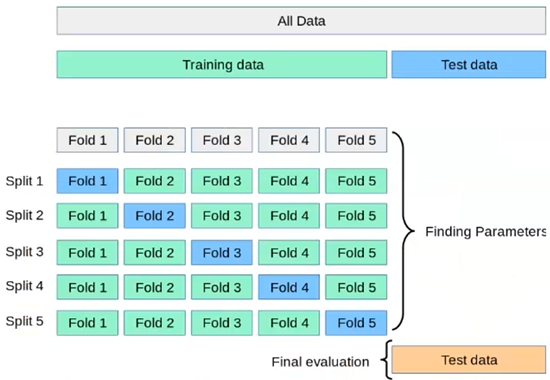

Como nuestro dataset fue partido en 5 folds, a este proceso lo llamamos __5 fold cross validation__, si hubieramos usado 10 folds entonces lo llamaríamos __10 fold cross validation__ y de forma mas general si usamos k folds se llamará __k folds cross validation__ o de forma mas compacta __K fold CV__.

Entre mas k folds necesitaremos conjuntos de entrenamiento mas grandes, esto conducira a modelos con menos sesgo pero posiblemente mas varianza,

valores tipicos de k estan entre 5 y 10 pero debemos considerar que hay un costo computacional al incrementar k, ya que por cada partición hay un modelo ajustado y recursos computacionales usados.

En resumen, Cross-validation nos sirve para:

1. Estimar el error generalizado de un modelo dado
2. Dado un grupo de modelos, seleccionar el que tenga el mejor performance
3. Seleccionar los mejores hiperparametros

#### Implementación en Python

Para usar K-Fold CV en python, usamos



```python
from sklearn.model_selection import KFold, cross_validate
```



1. Importamos `train_test_split`, `KFold` y `cross_validate` a partir del modulo `model_selection` de sklearn y también importamos el modelo de ML que queremos usar

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.linear_model import LinearRegression

2. Partmos los datos en conjuntos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.9, 
                                                    random_state=0)

3. Instanciamos el modelo

In [ ]:
reg = LinearRegression()

4. Definimos los Folds que usaremos

In [ ]:
kf = KFold(n_splits=5,    # definimos los splits 
           shuffle=True,   # Pedimos un orden aleatorío previo
           random_state=4) # Ingresamos una semilla para reproducibilidad

5. Realizamos la validación cruzada

In [ ]:
kfcv =  cross_validate(reg,                      # Indicamos el modelo
                       X_train,                  # Le pasamos los features de entrenamiento 
                       y_train,                  # Le pasamos la columna target de entrenamiento
                       scoring='neg_root_mean_squared_error',             # Declaramos que metrica deseamos darle seguimiento
                       return_train_score=True,  # Indicamos que también queremos ver el comportamiento de la metrica en Train 
                       cv=kf,                    # Le pasamos la cantidad de Folds definidos (tambien puede recibir números directamente)           
                       )

__NOTAS__: 

* En caso de no especificar el argumento scoring, por defecto este tomara accuracy en problemas de clasificación y $R^2$ en problemas de regresión.
* Los argumentos validos para scoring pueden ser consultados en [esta liga](https://scikit-learn.org/stable/modules/model_evaluation.html#)

6. obtenemos el promedio de la métrica de los 5 splits (generalización)

In [ ]:
type(kfcv)

dict

In [ ]:
kfcv.keys()

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

Este resultado es el que en promedio esperamos obtener en datos que no hemos visto

In [ ]:
kfcv['train_score']

array([-0.64383272, -0.63366388, -0.63722911, -0.6552191 , -0.65323797])

In [ ]:
kfcv['test_score']

array([-0.65419581, -0.6935689 , -0.67962808, -0.60719776, -0.61374558])

In [ ]:
np.abs(kfcv['train_score'].mean())

0.644636557893467

In [ ]:
np.abs(kfcv['test_score'].mean())

0.649667227885719

Es importante revisar la desviación estandar para darnos una idea de la centralidad de la información que acabamos de obtener

In [ ]:
print(kfcv['test_score'].mean(), '+-', kfcv['test_score'].std())

-0.649667227885719 +- 0.03446603493978384


7. Hacemos una inspección visual del comportamiento de la metrica en train y test

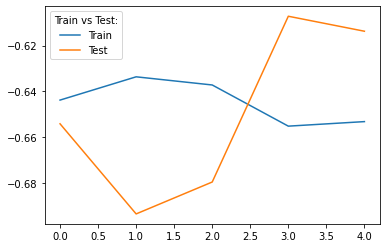

In [ ]:
plt.plot(range(5), kfcv['train_score'], label='Train')
plt.plot(range(5), kfcv['test_score'], label='Test')
plt.legend(title='Train vs Test:')
# plt.axis([0,9,0,1])
plt.show()

8. Finalmente Ajustamos el modelo sobre todos los datos de train y hacemos la evaluación final con Test

### LOOCV

Es un caso especial de K-Fold CV con __K__ = __n__, donde usamos solo una instancia para validar.

__NOTA__: __n__ es el numero de observaciones (instancias) en la muestra de entrenamiento

Consideraciones al usar este esquema:

1. Computacionalmente es muy caro
2. Los modelos serán muy identicos ya que las muestras sobre las que serán entrenados son practicamente iguales (esto puedo conducir a un problema de alta varianza) la unica diferencia será la instancia que quede fuera
3. Algunas metricas no pueden ser estimadas con este esquema, por ejemplo ROC-AUC, precision y recall

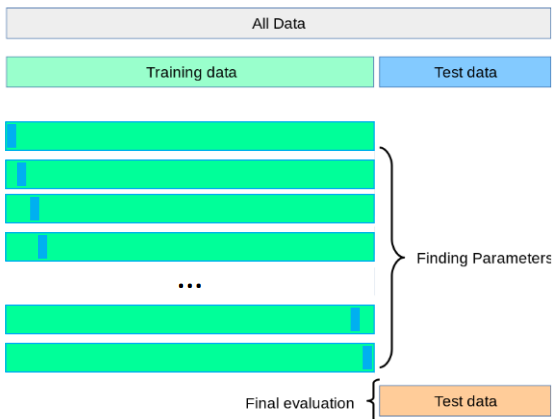

#### Implementación en Python

1. Importamos `train_test_split`, `LeaveOneOut` y `cross_validate` a partir del modulo `model_selection` de sklearn y también importamos el modelo de ML que queremos usar

In [ ]:
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.linear_model import LinearRegression

2. Partimos los datos en conjuntos de entrenamiento y prueba

In [ ]:
# En este paso train es muy pequeño ya que entrenaremos muchos modelos
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.95, 
                                                    random_state=0)

In [ ]:
X_train.shape

(1032, 8)

3. Instanciamos el modelo

In [ ]:
reg = LinearRegression()

4. Definimos los Folds que usaremos

In [ ]:
loo = LeaveOneOut()

__NOTA__: en este esquema esperamos tantas metricas como instancias en el set de entrenamiento

In [ ]:
print('Metricas esperadas: ', len(X_train))

Metricas esperadas:  1032


5. Realizamos la validación cruzada

In [ ]:
kfcv = cross_validate(reg,                      # Indicamos el modelo
                      X_train,                  # Le pasamos los features de entrenamiento 
                      y_train,                  # Le pasamos la columna target de entrenamiento
                      scoring='neg_root_mean_squared_error',             # Declaramos que metrica deseamos darle seguimiento
                      return_train_score=True,  # Indicamos que también queremos ver el comportamiento de la metrica en Train 
                      cv=loo,                   # Le pasamos la cantidad de Folds definidos (tambien puede recibir números directamente)           
                      )

6. Finalmente obtenemos el promedio de la métrica de los N splits (generalización)

In [ ]:
np.abs(kfcv['test_score']).mean()

0.4767355929713256

In [ ]:
np.abs(kfcv['train_score']).mean()

0.6366670606966556

7. Hacemos una inspección visual del comportamiento de la metrica en train y test

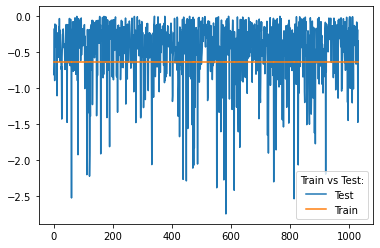

In [ ]:
rango = len(X_train)

plt.plot(range(rango), kfcv['test_score'], label='Test')
plt.plot(range(rango), kfcv['train_score'], label='Train')
plt.legend(title='Train vs Test:')
plt.show()

8. Finalmente Ajustamos el modelo sobre todos los datos de train y hacemos la evaluación final con Test

In [ ]:
from sklearn.metrics import mean_squared_error

lreg = LinearRegression().fit(X_train, y_train)
y_pred = lreg.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)**(1/2)

3.0421685119781103

### LPOCV

En este esquema se usa como validación todas las posibles combinaciones en P de las n observaciones y tiene las siguientes consideraciones:

* Computacionalmente es muy caro
* Para n observaciones esto produce $\binom{n}{p}$ conjuntos de train validation
* Se debe tomar en cuenta que algunos conjuntos de validación se traslaparan
* Los conjuntos de validación son mas grandes y tienen mejor performance que LOOCV


#### Implementación en Python

In [ ]:
from sklearn.model_selection import LeavePOut, cross_validate, train_test_split
from scipy.special import comb

In [ ]:
# Regresion
reg = LinearRegression()

# En este paso train es muy pequeño ya que entrenaremos muchos modelos
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.995, 
                                                    random_state=0)

In [ ]:
len(X_train)

103

In [ ]:
# Leave P Out Cross-Validation
lpo = LeavePOut(p=2)

In [ ]:
# numero de combinaciones de N en n
print('Esperamos : ', comb(len(X_train),2), ' metricas')

Esperamos :  5253.0  metricas


In [ ]:
# estimate generalization error
clf =  cross_validate(
    reg,
    X_train, 
    y_train,
    scoring='neg_root_mean_squared_error',
    return_train_score=True,
    cv=lpo, # k-fold
)

In [ ]:
clf['train_score'].mean()

-0.4528880114591661

In [ ]:
clf['test_score'].mean()

-0.4363835508258267

In [ ]:
print('Numbero de metricas obtenidas: ', len(clf['test_score']))

Numbero de metricas obtenidas:  5253


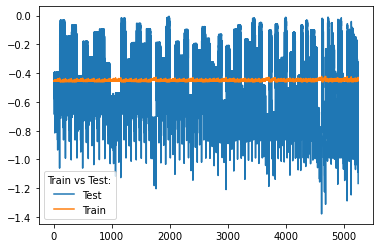

In [ ]:
plt.plot(range(5253), clf['test_score'], label='Test')
plt.plot(range(5253), clf['train_score'], label='Train')
plt.legend(title='Train vs Test:')
# plt.axis([0,9,0,1])
plt.show()

### Repeated K-Fold CV

Similar a K-Fold CV, pero la particion se hace n-veces. 

* Antes de crear nuevos cortes (splits) se ordenan aleatoriamente los datos
* Al final obtendremos K*n metricas de performance
* Es posible que algunos conjuntos de validación se traslapen


Ejemplo para n=4

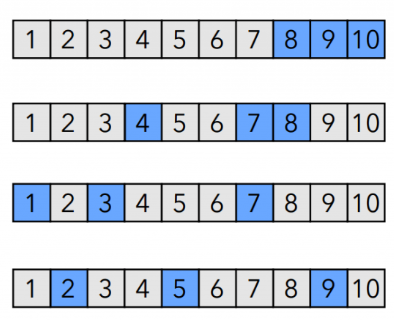

En este ejemplo si k=10 entonces tendremos 4*10 = 40 metricas para estimar la generalización

#### Implementación en Python

In [ ]:
from sklearn.model_selection import RepeatedKFold, cross_validate, train_test_split

In [ ]:
# Logistic Regression
lreg = LinearRegression()

In [ ]:
# Repeated K-Fold Cross-Validation
rkf = RepeatedKFold(
    n_splits=5,
    n_repeats=10,
    random_state=4,
)

In [ ]:
print('Esperamos K * n metricas: ', 5*10)

Esperamos K * n metricas:  50


In [ ]:
# estimate generalization error
clf =  cross_validate(
    lreg,
    X_train, 
    y_train,
    scoring='neg_root_mean_squared_error',
    return_train_score=True,
    cv=rkf, # k-fold
)

In [ ]:
clf['train_score'].mean()

-0.4462505127849303

In [ ]:
clf['test_score'].mean()

-0.5110552908148732

In [ ]:
print('Numero de metrics obtenidas: ', len(clf['test_score']))

Numero de metrics obtenidas:  50


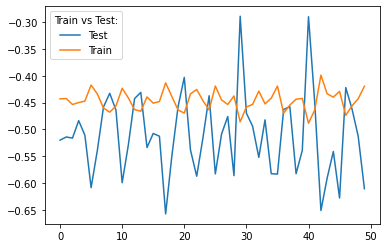

In [ ]:
plt.plot(range(50), clf['test_score'], label='Test')
plt.plot(range(50), clf['train_score'], label='Train')
plt.legend(title='Train vs Test:')
# plt.axis([0,9,0,1])
plt.show()

### Stratified CV

Este esquema es usado solo para problemas de clasificación, es muy similar a K-Fold CV solo que este esquema se asegura que cada fold tenga una proporcion de clases similar la proporcion del conjunto de entrenamiento.

* Es muy útil con problemas desbalanceados
* Los conjuntos de validación no se traslapan

#### Implementación en Python

In [ ]:
from sklearn.datasets import load_breast_cancer
data_c = load_breast_cancer()

cancer_df = (pd.DataFrame(data_c['data'])
            .rename(columns = {i[0]:i[1] for i in enumerate(data_c['feature_names'])})
            .assign(TARGET = [1 if i == 2 else 0 for i in data_c['target']])
            .assign(TARGET = data_c['target'].astype(int))
            .rename(columns = dict(zip(data_c.feature_names, [i.replace(' ', '_') for i in data_c.feature_names])))
            .dropna()
           )

cancer_df.head(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,TARGET
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
cancer_df.TARGET.value_counts()

1    357
0    212
Name: TARGET, dtype: int64

In [ ]:
357/(357 + 212)

0.6274165202108963

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_validate

En este paso estratificaremos desde la creación de train y test

In [ ]:
X = cancer_df.drop(columns = ['TARGET'])
y = cancer_df.TARGET

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.1,
                                                    stratify = y,  
                                                    random_state=0)

In [ ]:
y_train.value_counts()

1    321
0    191
Name: TARGET, dtype: int64

In [ ]:
321/(321 + 191)

0.626953125

In [ ]:
y_test.value_counts()

1    36
0    21
Name: TARGET, dtype: int64

In [ ]:
36/(36 + 21)

0.631578947368421

Validamos las proporciones de los datos en los datos completos, train y test

In [ ]:
print('totla de instancias: ', len(cancer_df))
print('totla de instancias con clase 1: ', sum(y))
print('Porcentaje de instancias con clase 1: ', round(sum(y)/(len(cancer_df)+ sum(y)), 3))

totla de instancias:  569
totla de instancias con clase 1:  357
Porcentaje de instancias con clase 1:  0.386


In [ ]:
print('totla de instancias en train: ', len(X_train))
print('totla de instancias en train con clase 1: ', sum(y_train))
print('Porcentaje de instancias en train con clase 1: ', round(sum(y_train)/(len(X_train)+ sum(y_train)), 3))

totla de instancias en train:  512
totla de instancias en train con clase 1:  321
Porcentaje de instancias en train con clase 1:  0.385


In [ ]:
print('totla de instancias en test: ', len(X_test))
print('totla de instancias en test con clase 1: ', sum(y_test))
print('Porcentaje de instancias en test con clase 1: ', round(sum(y_test)/(len(X_test)+ sum(y_test)), 3))

totla de instancias en test:  57
totla de instancias en test con clase 1:  36
Porcentaje de instancias en test con clase 1:  0.387


Instanciamos un modelo

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)

Creamos los Folds estratificados

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, 
                      shuffle=True, 
                      random_state=4)

Aplicamos el esquema de validación cruzada

In [ ]:
clf =  cross_validate(
    knn,
    X_train, 
    y_train,
    scoring='recall',
    return_train_score=True,
    cv=skf,
)

In [ ]:
print(clf['train_score'].mean())
print(clf['test_score'].mean())

0.9664251730103807
0.959375


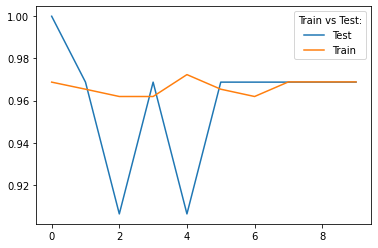

In [ ]:
plt.plot(range(10), clf['test_score'], label='Test')
plt.plot(range(10), clf['train_score'], label='Train')
plt.legend(title='Train vs Test:')
plt.show()

## Ejercicios

### Ejercicio 01

Considera los siguientes datos

In [ ]:
from sklearn.datasets import load_breast_cancer
data_c = load_breast_cancer()

cancer_df = (pd.DataFrame(data_c['data'])
            .rename(columns = {i[0]:i[1] for i in enumerate(data_c['feature_names'])})
            .assign(TARGET = data_c['target'].astype(int))
            .rename(columns = dict(zip(cancer_df.columns, [i.replace(' ', '_') for i in cancer_df.columns])))
            .dropna()
           )

cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TARGET
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


1. Ajusta un KNN
2. Selecciona un esquema de validación cruzada 
3. Encuentra el k que máximiza el accuracy (compara la metrica en train y test)
4. Encuentra el k que máximiza el recall (compara la metrica en train y test)
5. Encuentra el k que máximiza la precision (compara la metrica en train y test)
6. Encuentra el k que máximiza el F1-score (compara la metrica en train y test)

De cada punto deja tus conclusiones

In [ ]:
# RESPUESTA
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.linear_model import LinearRegression

### Ejercicio 02 (opcional)

Considera los datos

In [ ]:
from sklearn.datasets import fetch_california_housing

cal_house = (pd.DataFrame(fetch_california_housing()['data'])
             .rename(columns = {i:fetch_california_housing()['feature_names'][i] for i in range(8)})
             .assign(MedHouseVal = fetch_california_housing()['target'])
             )

cal_house.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


1. Ajusta una regresión ridge
2. selecciona un esquema de validación cruzada
3. Encuentra el mejor hiperparametro alpha que maximiza $R^2$ (compara la metrica en train y test)
3. Encuentra el mejor hiperparametro alpha que minimiza RMSE (compara la metrica en train y test)

De cada punto deja tus conclusiones

In [ ]:
# RESPUESTA

### Ejercicio 03 (Opcional)

Genera y gráfica intervalos de confianza para las medias de $R^2$ y RMSE generadas en la validación cruzada del ejercicio anterior

Considera:

* $ CI = \bar{x} \pm z \frac{s}{\sqrt{n}} $
* $\bar{x}$ = media muestral
* $z$ = valor del nivel de confianza
* $s$ = desviación estandar muestral
* $n$ = tamaño de la muestra

|confianza|z|
|------|------|
|75%|1.15|
|90%|1.64|
|95%|1.96|
|97%|2.17|
|99%|2.57|
|99.9%|3.29|

In [ ]:
# RESPUESTA